In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [4]:
df = df.drop("CustomerID", axis=1)


In [5]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


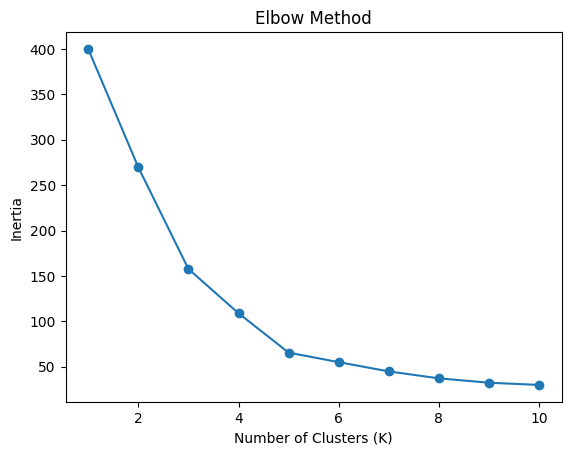

In [8]:
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [9]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)


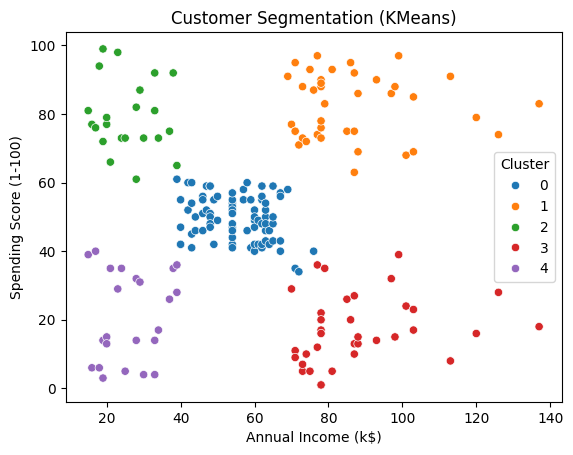

In [10]:
plt.figure()

sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="tab10"
)

plt.title("Customer Segmentation (KMeans)")
plt.show()


In [11]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(
    centroids,
    columns=["Annual Income (k$)", "Spending Score (1-100)"]
)

print(centroid_df)


   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [12]:
df.to_csv("segmented_customers.csv", index=False)


In [13]:
from google.colab import files
files.download("segmented_customers.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>